<a href="https://colab.research.google.com/github/daanishrasheed/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [31]:
import pandas as pd
col_names=["party", "handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution",
"physician-fee-freeze",
"el-salvador-aid",
"religious-groups-in-schools",
"anti-satellite-test-ban",
"aid-to-nicaraguan-contras",
"mx-missile",
"immigration",
"synfuels-corporation-cutback",
"education-spending",
"superfund-right-to-sue",
"crime",
"duty-free-exports",
"export-administration-act-south-africa"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names = col_names)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [32]:
import numpy as np
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [33]:
from scipy import stats
def mean_confidence_interval(data, confidence):
  data = np.array(data)
  mean = np.nanmean(data)
  n = len(data)
  stderr = stats.sem(data, nan_policy='omit')
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)


mean_confidence_interval(df['immigration'], confidence = .95)

(0.5046728971962616, 0.4571176976013912, 0.552228096791132)

In [34]:
rep = df[df.party == "republican"]
dem = df[df.party == "democrat"]


mean_confidence_interval(dem['immigration'], confidence = .95)

(0.4714828897338403, 0.41076167770876976, 0.5322041017589109)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


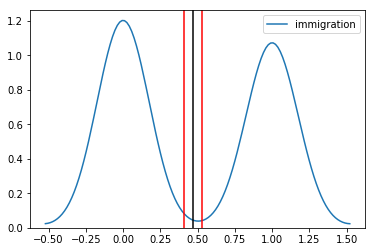

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(dem['immigration'])
CI = mean_confidence_interval(dem['immigration'], .95)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

The confidence interval for this case also looks to be very narrow which means that the estimate of whether a democrat supports immigration or not, is very precise.

In [36]:
from google.colab import files
uploaded = files.upload()

In [40]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

df = pd.read_csv('adult.data', names=column_headers)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
df.shape

(32561, 15)

In [42]:
print(df[['education', 'relationship']])

           education     relationship
0          Bachelors    Not-in-family
1          Bachelors          Husband
2            HS-grad    Not-in-family
3               11th          Husband
4          Bachelors             Wife
5            Masters             Wife
6                9th    Not-in-family
7            HS-grad          Husband
8            Masters    Not-in-family
9          Bachelors          Husband
10      Some-college          Husband
11         Bachelors          Husband
12         Bachelors        Own-child
13        Assoc-acdm    Not-in-family
14         Assoc-voc          Husband
15           7th-8th          Husband
16           HS-grad        Own-child
17           HS-grad        Unmarried
18              11th          Husband
19           Masters        Unmarried
20         Doctorate          Husband
21           HS-grad        Unmarried
22               9th          Husband
23              11th          Husband
24           HS-grad        Unmarried
25         B

In [44]:
contingency_table = pd.crosstab(df['education'], df['relationship'], margins=True)

contingency_table

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
education,,,,,,,
10th,313,210,43,225,113,29,933
11th,311,211,59,426,138,30,1175
12th,103,97,23,154,38,18,433
1st-4th,70,50,16,9,19,4,168
5th-6th,149,70,40,15,45,14,333
7th-8th,333,138,33,49,73,20,646
9th,202,111,30,80,70,21,514
Assoc-acdm,380,331,15,131,134,76,1067
Assoc-voc,596,351,24,144,184,83,1382


In [46]:
row_sums = contingency_table.iloc[0:16, 6].values
col_sums = contingency_table.iloc[16, 0:6].values

print(row_sums)
print(col_sums)

[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]
[13193  8305   981  5068  3446  1568]


In [48]:
total = contingency_table.loc['All','All']
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(16, 6)
[[3.78031049e+02 2.37970732e+02 2.81094868e+01 1.45218022e+02
  9.87413777e+01 4.49293326e+01]
 [4.76084119e+02 2.99695187e+02 3.54004791e+01 1.82884432e+02
  1.24352753e+02 5.65830288e+01]
 [1.75442063e+02 1.10440865e+02 1.30454531e+01 6.73948589e+01
  4.58253125e+01 2.08514481e+01]
 [6.80698996e+01 4.28500353e+01 5.06151531e+00 2.61485827e+01
  1.77797979e+01 8.09016922e+00]
 [1.34924265e+02 8.49348914e+01 1.00326464e+01 5.18302263e+01
  3.52420994e+01 1.60358711e+01]
 [2.61744971e+02 1.64768588e+02 1.94627315e+01 1.00547526e+02
  6.83675563e+01 3.11086269e+01]
 [2.08261478e+02 1.31100703e+02 1.54858266e+01 8.00022112e+01
  5.43977151e+01 2.47520654e+01]
 [4.32324898e+02 2.72148736e+02 3.21466478e+01 1.66074629e+02
  1.12922883e+02 5.13822057e+01]
 [5.59955960e+02 3.52492552e+02 4.16369890e+01 2.15103222e+02
  1.46260004e+02 6.65512730e+01]
 [2.16972805e+03 1.36584488e+03 1.61335800e+02 8.33486072e+02
  5.66731059e+02 2.57874144e+02]
 [1.67338503e+02 1.05339670e+02 1.24428918

In [49]:
observed = pd.crosstab(df['education'], df['relationship']).values
print(observed.shape)
observed

(16, 6)


array([[ 313,  210,   43,  225,  113,   29],
       [ 311,  211,   59,  426,  138,   30],
       [ 103,   97,   23,  154,   38,   18],
       [  70,   50,   16,    9,   19,    4],
       [ 149,   70,   40,   15,   45,   14],
       [ 333,  138,   33,   49,   73,   20],
       [ 202,  111,   30,   80,   70,   21],
       [ 380,  331,   15,  131,  134,   76],
       [ 596,  351,   24,  144,  184,   83],
       [2433, 1665,   87,  523,  342,  305],
       [ 265,   96,    3,    7,   22,   20],
       [4279, 2517,  391, 1504, 1312,  498],
       [ 886,  517,   11,   56,  141,  112],
       [  14,   21,    5,    6,    2,    3],
       [ 385,  123,    4,   14,   24,   26],
       [2474, 1797,  197, 1725,  789,  309]])

In [50]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 2449.2301947700535


In [51]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2449.2301947700535
P-value: 0.0
Degrees of Freedom: 75
Expected: 
 [[3.78031049e+02 2.37970732e+02 2.81094868e+01 1.45218022e+02
  9.87413777e+01 4.49293326e+01]
 [4.76084119e+02 2.99695187e+02 3.54004791e+01 1.82884432e+02
  1.24352753e+02 5.65830288e+01]
 [1.75442063e+02 1.10440865e+02 1.30454531e+01 6.73948589e+01
  4.58253125e+01 2.08514481e+01]
 [6.80698996e+01 4.28500353e+01 5.06151531e+00 2.61485827e+01
  1.77797979e+01 8.09016922e+00]
 [1.34924265e+02 8.49348914e+01 1.00326464e+01 5.18302263e+01
  3.52420994e+01 1.60358711e+01]
 [2.61744971e+02 1.64768588e+02 1.94627315e+01 1.00547526e+02
  6.83675563e+01 3.11086269e+01]
 [2.08261478e+02 1.31100703e+02 1.54858266e+01 8.00022112e+01
  5.43977151e+01 2.47520654e+01]
 [4.32324898e+02 2.72148736e+02 3.21466478e+01 1.66074629e+02
  1.12922883e+02 5.13822057e+01]
 [5.59955960e+02 3.52492552e+02 4.16369890e+01 2.15103222e+02
  1.46260004e+02 6.65512730e+01]
 [2.16972805e+03 1.36584488e+03 1.61335800e+02 8.33486072e+02
  5

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)